In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
from PIL import Image

import keras
from keras.preprocessing import image
from keras.applications.nasnet import (
    NASNetLarge, 
    preprocess_input, 
    decode_predictions
)

Using TensorFlow backend.


In [2]:
# Load the NASNetLarge model
# https://keras.io/applications/#nasnet
model = NASNetLarge(include_top=True, weights='imagenet')

359751680/359748576 [==============================] - 19s 0us/step


In [4]:
# Function to load the image, display it and show our NASNetLarge prediction results
def predict(image_path):
    """Use NASNetLarge to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=5))

Predicted: [[('n04099969', 'rocking_chair', 0.9056225), ('n03376595', 'folding_chair', 0.013239457), ('n04356056', 'sunglasses', 0.0050625303), ('n04355933', 'sunglass', 0.005015209), ('n02797295', 'barrow', 0.0043333825)]]


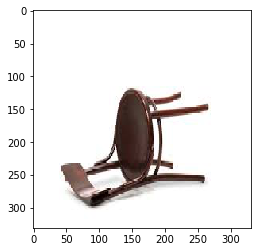

In [5]:
# Default Image Size for NASNetLarge
image_size = (331, 331, 3)

# Load the image and resize to default image size
image_path = os.path.join("..", "images", "chair_on_back.jpg")

# Make predictions
predict(image_path)

Predicted: [[('n03376595', 'folding_chair', 0.5959782), ('n03201208', 'dining_table', 0.078667015), ('n04099969', 'rocking_chair', 0.050978538), ('n03903868', 'pedestal', 0.013281069), ('n03179701', 'desk', 0.012913699)]]


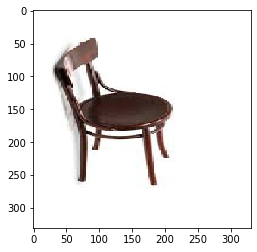

In [6]:
# Try again with rotated image showing the chair upright

###### Prediction as PNG file
# Load the image and resize to default image size
image_path = os.path.join("..", "images", "brown_chair_upright.png")

# Make predictions
predict(image_path)

Predicted: [[('n03376595', 'folding_chair', 0.6547525), ('n03201208', 'dining_table', 0.052178796), ('n04099969', 'rocking_chair', 0.048674803), ('n03903868', 'pedestal', 0.011622794), ('n03179701', 'desk', 0.009906622)]]


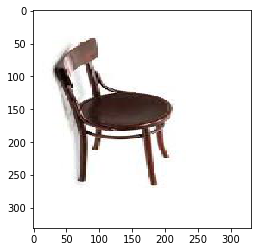

In [7]:
###### Prediction as JPG file
# Load the image and resize to default image size
image_path = os.path.join("..", "images", "brown_chair_upright.jpg")

# Make predictions
predict(image_path)

Predicted: [[('n04501370', 'turnstile', 0.8590363), ('n03961711', 'plate_rack', 0.007076213), ('n02788148', 'bannister', 0.0028902518), ('n03888605', 'parallel_bars', 0.0021981292), ('n04204347', 'shopping_cart', 0.0016223656)]]


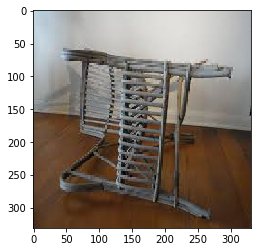

In [8]:
# Try process again with a chair lying on its side, instead of its back

# Load the image and resize to default image size
image_path = os.path.join("..", "images", "chair_on_left_side.jpg")

# Make predictions
predict(image_path)

Predicted: [[('n03961711', 'plate_rack', 0.53062713), ('n04099969', 'rocking_chair', 0.13011399), ('n03125729', 'cradle', 0.09229525), ('n03376595', 'folding_chair', 0.010744907), ('n03131574', 'crib', 0.0053720875)]]


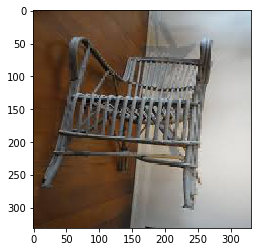

In [9]:
# See if results change for the new version of the gray chair
image_path = os.path.join("..", "images", "gray_chair_upright.png")
predict(image_path)